<a href="https://colab.research.google.com/github/Saradabre/STOCK_MARKET_ANALYSIS/blob/main/STOCK_MARKET_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
pip install ydata-sdk

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from matplotlib.patches import Polygon
import warnings
warnings.filterwarnings('ignore')



IMPORTING DATASET

In [ ]:
Data=pd.read_csv('/content/Market.csv')
df = pd.DataFrame(Data)
df



Index        Date         Open         High          Low        Close  \
0        NYA  12/31/1965   528.690002   528.690002   528.690002   528.690002   
1        NYA    1/3/1966   527.210022   527.210022   527.210022   527.210022   
2        NYA    1/4/1966   527.840027   527.840027   527.840027   527.840027   
3        NYA    1/5/1966   531.119995   531.119995   531.119995   531.119995   
4        NYA    1/6/1966   532.070007   532.070007   532.070007   532.070007   
...      ...         ...          ...          ...          ...          ...   
112452  N100   5/27/2021  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100   5/28/2021  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100   5/31/2021  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100    6/1/2021  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100    6/2/2021  1258.489990  1263.709961  1258.239990  1263.619995   

          Adj Close       Volume  
0        528.690002          0.0  
1        527.210022          0.0  
2        527.840027          0.0  
3        531.119995          0.0  
4        532.070007          0.0  
...             ...          ...  
112452  1247.069946  379696400.0  
112453  1256.599976  160773400.0  
112454  1248.930054   91173700.0  
112455  1258.579956  155179900.0  
112456  1263.619995  148465000.0  

[112457 rows x 8 columns]

In [ ]:
# Import ProfileReport from the YData SDK
from ydata_profiling import ProfileReport


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df,
    minimal=True,
    progress_bar=False,
    samples=None,
    correlations=None,
    interactions=None,
    explorative=True,
    notebook={'iframe': {'height': '600px'}},
    html={'style': {'primary_color': '#583101'}},
    missing_diagrams={'heatmap': False, 'dendrogram': False}
)

profile.to_notebook_iframe()


100%|██████████| 8/8 [00:01<00:00,  6.03it/s]


CHECKING DATA

In [ ]:
df.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.shape

(112457, 8)

There are 8 columns & 112457 rows (Features)  in this dataset..

In [ ]:
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(112457, 8)

Types
Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

NANs
Index           0
Date            0
Open         2204
High         2205
Low          2206
Close        2207
Adj Close    2213
Volume       2204
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110252 non-null  float64
 4   Low        110251 non-null  float64
 5   Close      110250 non-null  float64
 6   Adj Close  110244 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB
None


In [ ]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))



Number of duplicated rows:  0




    there is no duplicated row and no NAN 313 datas.
    all variable types are float64 except for the date & index.



In [ ]:
df1 = df[df["Index"] == "NYA"]
df1


Index        Date          Open          High           Low  \
0       NYA  12/31/1965    528.690002    528.690002    528.690002   
1       NYA    1/3/1966    527.210022    527.210022    527.210022   
2       NYA    1/4/1966    527.840027    527.840027    527.840027   
3       NYA    1/5/1966    531.119995    531.119995    531.119995   
4       NYA    1/6/1966    532.070007    532.070007    532.070007   
...     ...         ...           ...           ...           ...   
13943   NYA   5/24/2021  16375.000000  16508.519530  16375.000000   
13944   NYA   5/25/2021  16464.689450  16525.810550  16375.150390   
13945   NYA   5/26/2021  16390.189450  16466.339840  16388.320310   
13946   NYA   5/27/2021  16451.960940  16546.359380  16451.960940   
13947   NYA   5/28/2021  16531.949220  16588.689450  16531.949220   

              Close     Adj Close        Volume  
0        528.690002    528.690002  0.000000e+00  
1        527.210022    527.210022  0.000000e+00  
2        527.840027    527.840027  0.000000e+00  
3        531.119995    531.119995  0.000000e+00  
4        532.070007    532.070007  0.000000e+00  
...             ...           ...           ...  
13943  16464.689450  16464.689450  2.947400e+09  
13944  16390.189450  16390.189450  3.420870e+09  
13945  16451.960940  16451.960940  3.674490e+09  
13946  16531.949220  16531.949220  5.201110e+09  
13947  16555.660160  16555.660160  4.199270e+09  

[13948 rows x 8 columns]

In [ ]:
df1.describe()[1:].T.style.background_gradient(cmap='bone', axis=1)



    we can see statistical information on the table above which illustrates the statistically important factors for each column.



In [ ]:
df1.apply(lambda x: len(x.unique()))

Index            1
Date         13948
Open         11580
High         11572
Low          11576
Close        11591
Adj Close    11591
Volume        5002
dtype: int64

In [ ]:
unique = df1.nunique().sort_values()
unique_values = df1.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})



Number of Unique Values  \
Adj Close                    11590   
Close                        11590   
Date                         13948   
High                         11571   
Index                            1   
Low                          11575   
Open                         11579   
Volume                        5001   

                                               Unique Values  
Adj Close  [528.690002, 527.210022, 527.840027, 531.11999...  
Close      [528.690002, 527.210022, 527.840027, 531.11999...  
Date       [12/31/1965, 1/3/1966, 1/4/1966, 1/5/1966, 1/6...  
High       [528.690002, 527.210022, 527.840027, 531.11999...  
Index                                                  [NYA]  
Low        [528.690002, 527.210022, 527.840027, 531.11999...  
Open       [528.690002, 527.210022, 527.840027, 531.11999...  
Volume     [0.0, nan, 1880700000.0, 2169400000.0, 1430800...

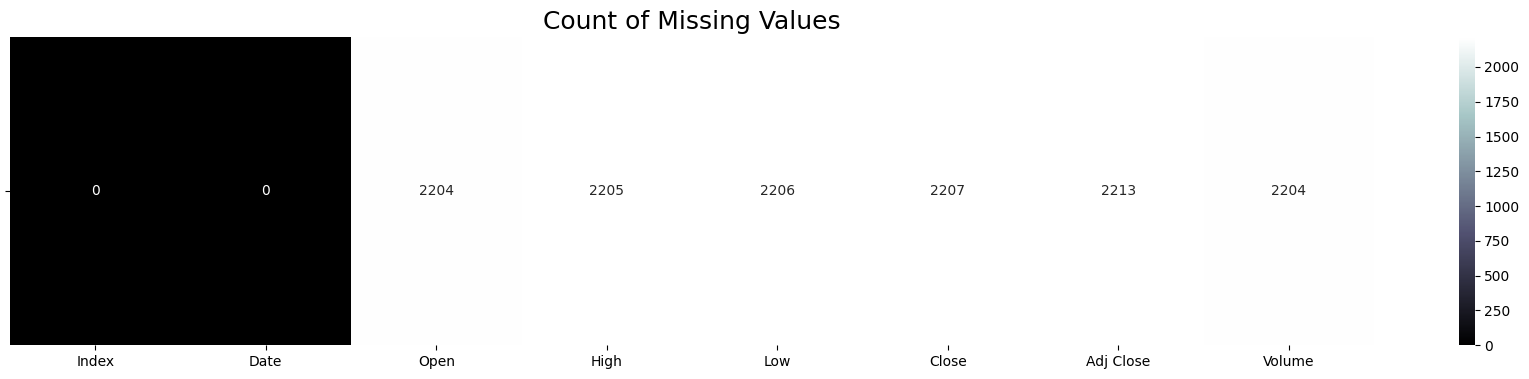

In [ ]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='bone', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()



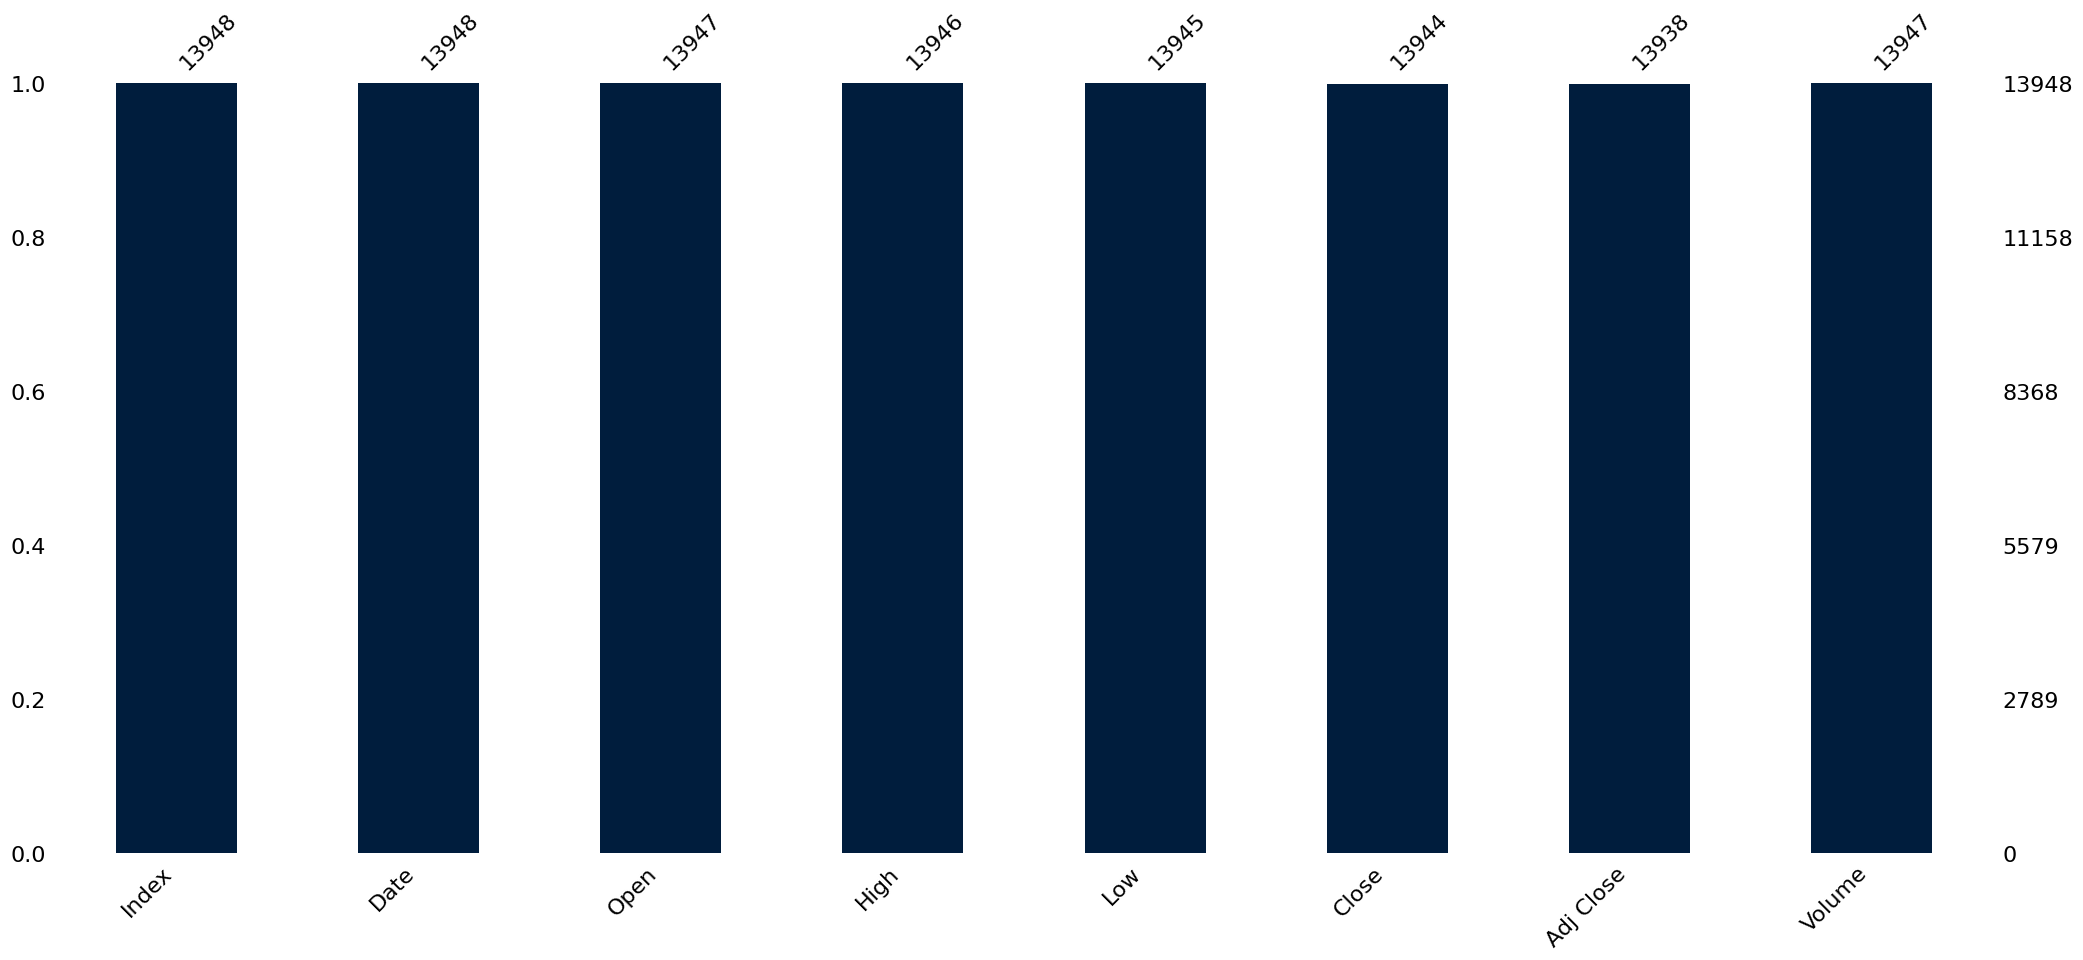

In [ ]:
msno.bar(df1, color='#001D3D')
plt.show()



In [ ]:
df1.isnull().sum()

Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
Volume        1
dtype: int64

we can drop or fill missing values.

In [ ]:
df2 = df1.dropna()
df2



Index        Date          Open          High           Low  \
0       NYA  12/31/1965    528.690002    528.690002    528.690002   
1       NYA    1/3/1966    527.210022    527.210022    527.210022   
2       NYA    1/4/1966    527.840027    527.840027    527.840027   
3       NYA    1/5/1966    531.119995    531.119995    531.119995   
4       NYA    1/6/1966    532.070007    532.070007    532.070007   
...     ...         ...           ...           ...           ...   
13943   NYA   5/24/2021  16375.000000  16508.519530  16375.000000   
13944   NYA   5/25/2021  16464.689450  16525.810550  16375.150390   
13945   NYA   5/26/2021  16390.189450  16466.339840  16388.320310   
13946   NYA   5/27/2021  16451.960940  16546.359380  16451.960940   
13947   NYA   5/28/2021  16531.949220  16588.689450  16531.949220   

              Close     Adj Close        Volume  
0        528.690002    528.690002  0.000000e+00  
1        527.210022    527.210022  0.000000e+00  
2        527.840027    527.840027  0.000000e+00  
3        531.119995    531.119995  0.000000e+00  
4        532.070007    532.070007  0.000000e+00  
...             ...           ...           ...  
13943  16464.689450  16464.689450  2.947400e+09  
13944  16390.189450  16390.189450  3.420870e+09  
13945  16451.960940  16451.960940  3.674490e+09  
13946  16531.949220  16531.949220  5.201110e+09  
13947  16555.660160  16555.660160  4.199270e+09  

[13932 rows x 8 columns]

In [ ]:
df3 = df2.drop(columns = "Volume")
df3

Index        Date          Open          High           Low  \
0       NYA  12/31/1965    528.690002    528.690002    528.690002   
1       NYA    1/3/1966    527.210022    527.210022    527.210022   
2       NYA    1/4/1966    527.840027    527.840027    527.840027   
3       NYA    1/5/1966    531.119995    531.119995    531.119995   
4       NYA    1/6/1966    532.070007    532.070007    532.070007   
...     ...         ...           ...           ...           ...   
13943   NYA   5/24/2021  16375.000000  16508.519530  16375.000000   
13944   NYA   5/25/2021  16464.689450  16525.810550  16375.150390   
13945   NYA   5/26/2021  16390.189450  16466.339840  16388.320310   
13946   NYA   5/27/2021  16451.960940  16546.359380  16451.960940   
13947   NYA   5/28/2021  16531.949220  16588.689450  16531.949220   

              Close     Adj Close  
0        528.690002    528.690002  
1        527.210022    527.210022  
2        527.840027    527.840027  
3        531.119995    531.119995  
4        532.070007    532.070007  
...             ...           ...  
13943  16464.689450  16464.689450  
13944  16390.189450  16390.189450  
13945  16451.960940  16451.960940  
13946  16531.949220  16531.949220  
13947  16555.660160  16555.660160  

[13932 rows x 7 columns]

In [ ]:
df4 = round(df3)
df4

Index        Date     Open     High      Low    Close  Adj Close
0       NYA  12/31/1965    529.0    529.0    529.0    529.0      529.0
1       NYA    1/3/1966    527.0    527.0    527.0    527.0      527.0
2       NYA    1/4/1966    528.0    528.0    528.0    528.0      528.0
3       NYA    1/5/1966    531.0    531.0    531.0    531.0      531.0
4       NYA    1/6/1966    532.0    532.0    532.0    532.0      532.0
...     ...         ...      ...      ...      ...      ...        ...
13943   NYA   5/24/2021  16375.0  16509.0  16375.0  16465.0    16465.0
13944   NYA   5/25/2021  16465.0  16526.0  16375.0  16390.0    16390.0
13945   NYA   5/26/2021  16390.0  16466.0  16388.0  16452.0    16452.0
13946   NYA   5/27/2021  16452.0  16546.0  16452.0  16532.0    16532.0
13947   NYA   5/28/2021  16532.0  16589.0  16532.0  16556.0    16556.0

[13932 rows x 7 columns]

In [ ]:
df4.sort_values(by = ["Date"])
df4

Index        Date     Open     High      Low    Close  Adj Close
0       NYA  12/31/1965    529.0    529.0    529.0    529.0      529.0
1       NYA    1/3/1966    527.0    527.0    527.0    527.0      527.0
2       NYA    1/4/1966    528.0    528.0    528.0    528.0      528.0
3       NYA    1/5/1966    531.0    531.0    531.0    531.0      531.0
4       NYA    1/6/1966    532.0    532.0    532.0    532.0      532.0
...     ...         ...      ...      ...      ...      ...        ...
13943   NYA   5/24/2021  16375.0  16509.0  16375.0  16465.0    16465.0
13944   NYA   5/25/2021  16465.0  16526.0  16375.0  16390.0    16390.0
13945   NYA   5/26/2021  16390.0  16466.0  16388.0  16452.0    16452.0
13946   NYA   5/27/2021  16452.0  16546.0  16452.0  16532.0    16532.0
13947   NYA   5/28/2021  16532.0  16589.0  16532.0  16556.0    16556.0

[13932 rows x 7 columns]

first, we delete the column that we don't need (Volume) and then we make the decimal part of the numbers as well, keeping the general format of the dataset and the data, we render each number. finally, we sort the data based on date

In [ ]:
df4.describe(include='all').T.style.background_gradient(cmap='bone', axis=1)



In [ ]:
df4.describe().T.style.background_gradient(cmap='bone', axis=1)



In [ ]:
df4.describe(include=object).T.style.background_gradient(cmap='bone', axis=1)

In [ ]:
df5 = df4.fillna(method='ffill', axis=1)
df5

Index        Date     Open     High      Low    Close Adj Close
0       NYA  12/31/1965    529.0    529.0    529.0    529.0     529.0
1       NYA    1/3/1966    527.0    527.0    527.0    527.0     527.0
2       NYA    1/4/1966    528.0    528.0    528.0    528.0     528.0
3       NYA    1/5/1966    531.0    531.0    531.0    531.0     531.0
4       NYA    1/6/1966    532.0    532.0    532.0    532.0     532.0
...     ...         ...      ...      ...      ...      ...       ...
13943   NYA   5/24/2021  16375.0  16509.0  16375.0  16465.0   16465.0
13944   NYA   5/25/2021  16465.0  16526.0  16375.0  16390.0   16390.0
13945   NYA   5/26/2021  16390.0  16466.0  16388.0  16452.0   16452.0
13946   NYA   5/27/2021  16452.0  16546.0  16452.0  16532.0   16532.0
13947   NYA   5/28/2021  16532.0  16589.0  16532.0  16556.0   16556.0

[13932 rows x 7 columns]

dataset under our review and after removing the unnecessary column, had only 20 rows containing missing values, which make up 0.14% of the data and the initial rows in the dataset (13948), so due to these low numbers, we continue to work. We work with the dataframe in which we removed the missing values ​​with the help of dropna and finally reached 13932 rows and 7 columns and continue the exercise.

In [ ]:
df5.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64



    we use the pandas.to_datetime() method to change the values in the Date column to datetime objects. We also generate separate columns for Year, Month, and Day to prepare for possible analyses over various time periods. The resulting dataset is shown in the table below. 🗓️



In [ ]:
df4['Date'] = pd.to_datetime(df4['Date'])

In [ ]:
df4['Day'] = df4['Date'].dt.day
df4['Month'] = df4['Date'].dt.month
df4['Year'] = df4['Date'].dt.year

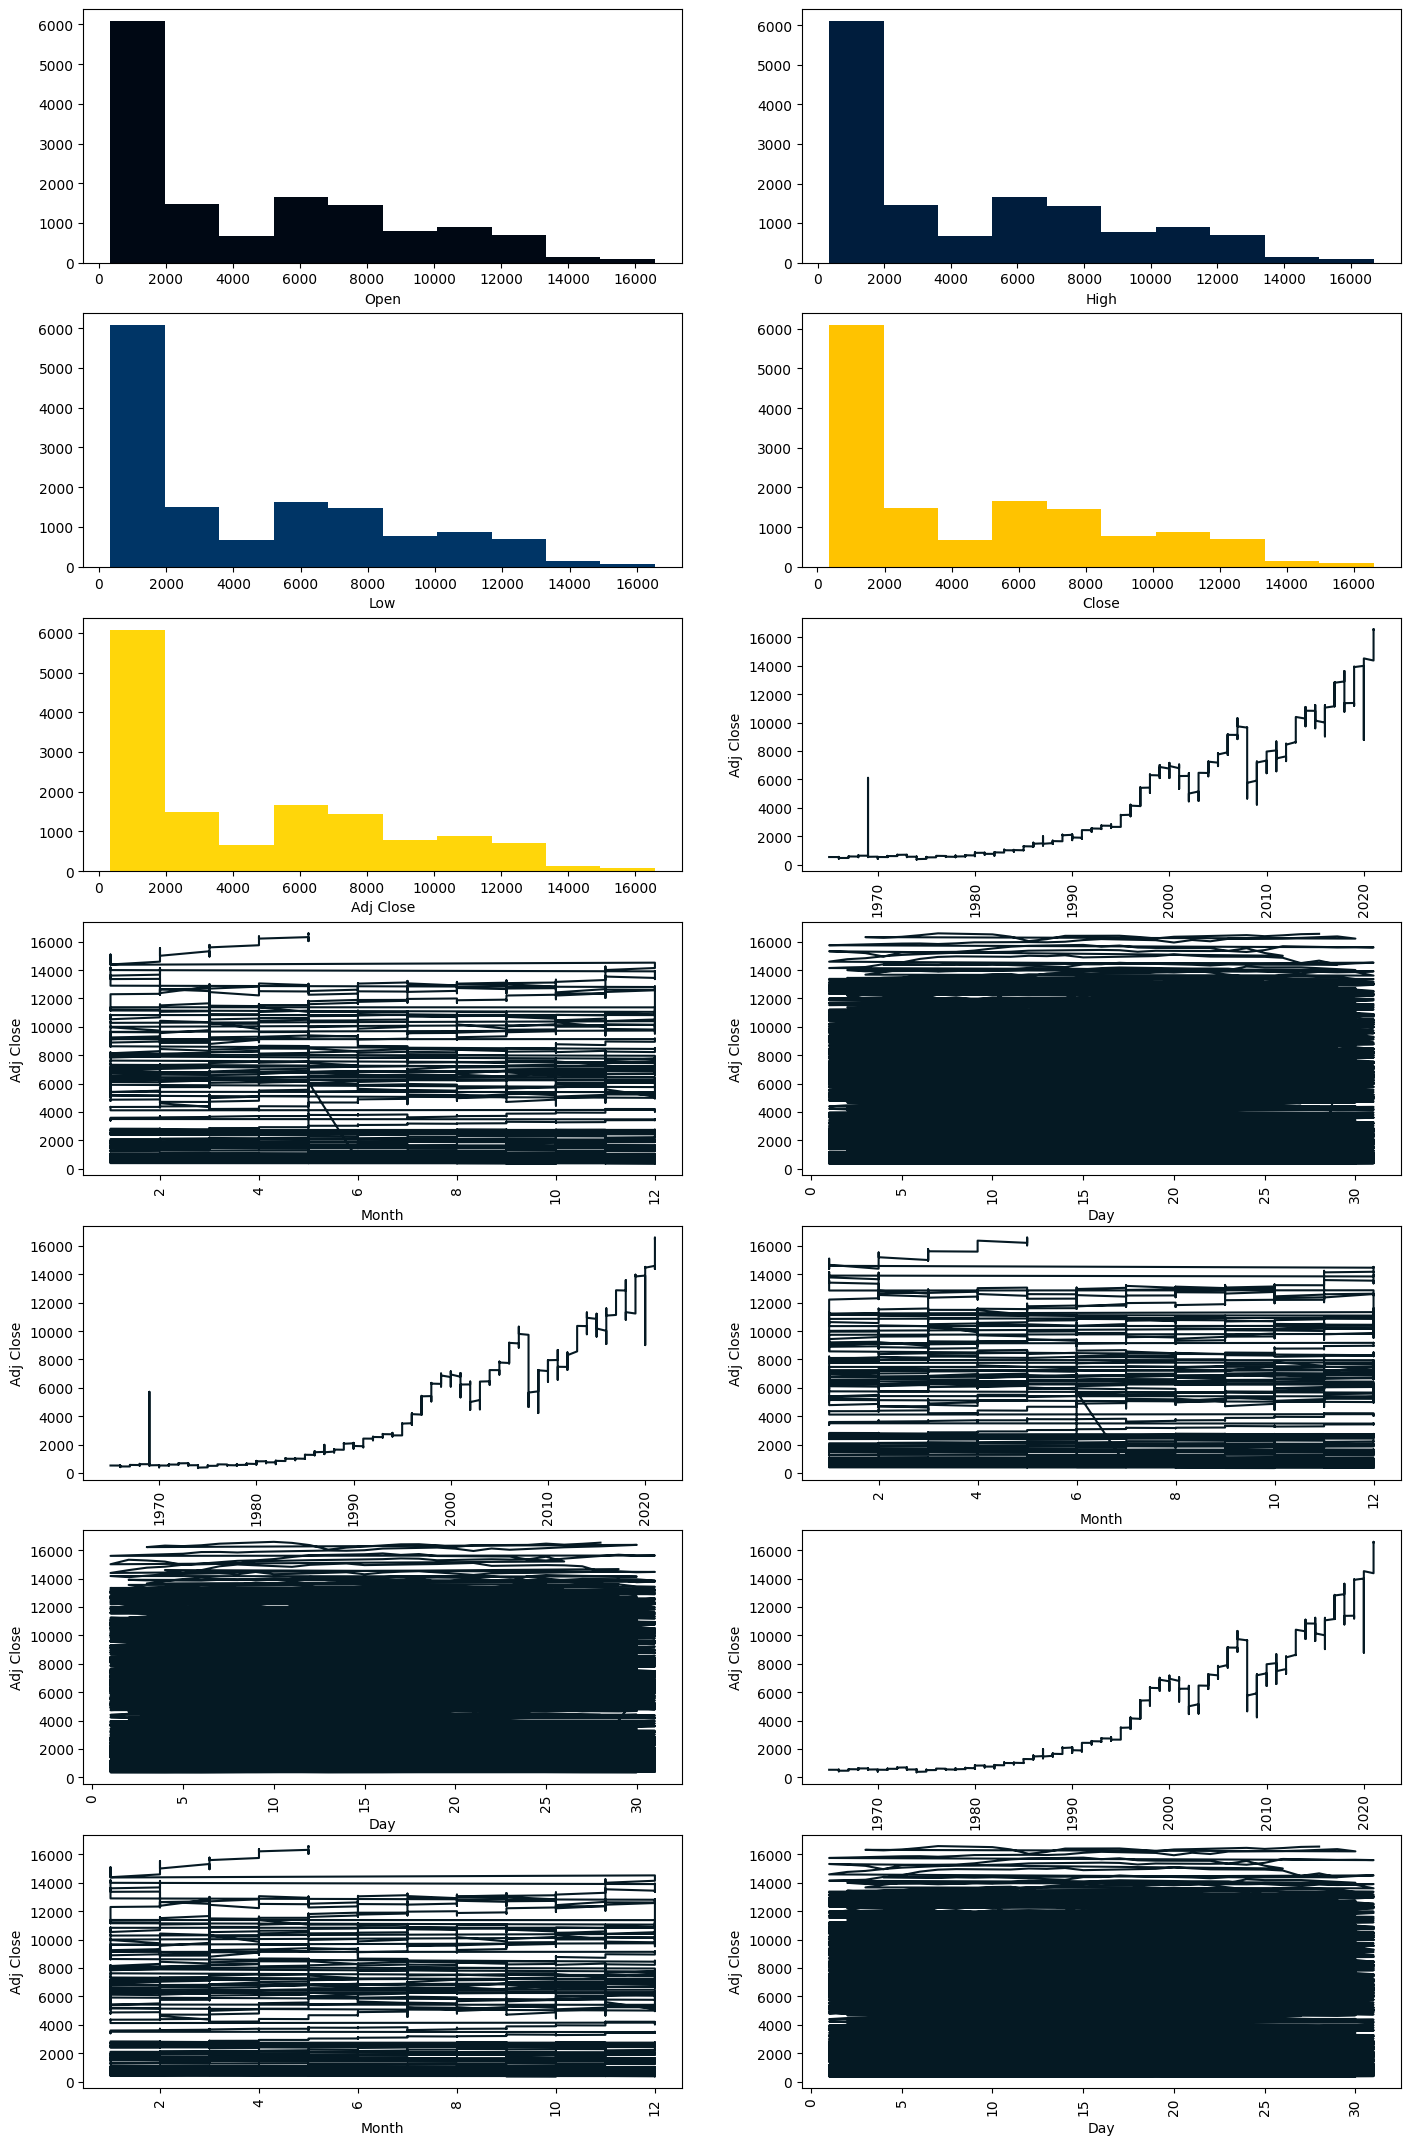

In [ ]:
fig, axs = plt.subplots(7, 2, figsize=(17, 27))
axs[0, 0].hist(df4['Open'], color='#000814')
axs[0, 0].set_xlabel('Open', fontsize=10)
axs[0, 1].hist(df4['High'], color='#001D3D')
axs[0, 1].set_xlabel('High', fontsize=10)
axs[1, 0].hist(df4['Low'], color='#003566')
axs[1, 0].set_xlabel('Low', fontsize=10)
axs[1, 1].hist(df4['Close'], color='#FFC300')
axs[1, 1].set_xlabel('Close', fontsize=10)
axs[2, 0].hist(df4['Adj Close'], color='#FFD60A')
axs[2, 0].set_xlabel('Adj Close', fontsize=10)
axs[2, 1].plot(df4['Year'], df4['Adj Close'], color='#051923')
axs[2, 1].set_xlabel('Year', fontsize=10)
axs[2, 1].set_ylabel('Adj Close', fontsize=10)
axs[2, 1].tick_params(axis='x', rotation=90)
axs[3, 0].plot(df4['Month'], df4['Adj Close'], color='#051923')
axs[3, 0].set_xlabel('Month', fontsize=10)
axs[3, 0].set_ylabel('Adj Close', fontsize=10)
axs[3, 0].tick_params(axis='x', rotation=90)
axs[3, 1].plot(df4['Day'], df4['Adj Close'], color='#051923')
axs[3, 1].set_xlabel('Day', fontsize=10)
axs[3, 1].set_ylabel('Adj Close', fontsize=10)
axs[3, 1].tick_params(axis='x', rotation=90)

axs[4, 0].plot(df4['Year'], df4['Open'], color='#051923')
axs[4, 0].set_xlabel('Year', fontsize=10)
axs[4, 0].set_ylabel('Adj Close', fontsize=10)
axs[4, 0].tick_params(axis='x', rotation=90)
axs[4, 1].plot(df4['Month'], df4['Open'], color='#051923')
axs[4, 1].set_xlabel('Month', fontsize=10)
axs[4, 1].set_ylabel('Adj Close', fontsize=10)
axs[4, 1].tick_params(axis='x', rotation=90)
axs[5, 0].plot(df4['Day'], df4['Open'], color='#051923')
axs[5, 0].set_xlabel('Day', fontsize=10)
axs[5, 0].set_ylabel('Adj Close', fontsize=10)
axs[5, 0].tick_params(axis='x', rotation=90)

axs[5, 1].plot(df4['Year'], df4['Close'], color='#051923')
axs[5, 1].set_xlabel('Year', fontsize=10)
axs[5, 1].set_ylabel('Adj Close', fontsize=10)
axs[5, 1].tick_params(axis='x', rotation=90)
axs[6, 0].plot(df4['Month'], df4['Close'], color='#051923')
axs[6, 0].set_xlabel('Month', fontsize=10)
axs[6, 0].set_ylabel('Adj Close', fontsize=10)
axs[6, 0].tick_params(axis='x', rotation=90)
axs[6, 1].plot(df4['Day'], df4['Close'], color='#051923')
axs[6, 1].set_xlabel('Day', fontsize=10)
axs[6, 1].set_ylabel('Adj Close', fontsize=10)
axs[6, 1].tick_params(axis='x', rotation=90)
plt.show()



    histograms are shown and the closing day-price chart before noise shows the closing price fluctuations in days and years. As can be seen, over time, the final price has had an upward trend despite the existing fluctuations. According to the fluctuation observed near 1970, an investigation should be done for the noise or not of that data.



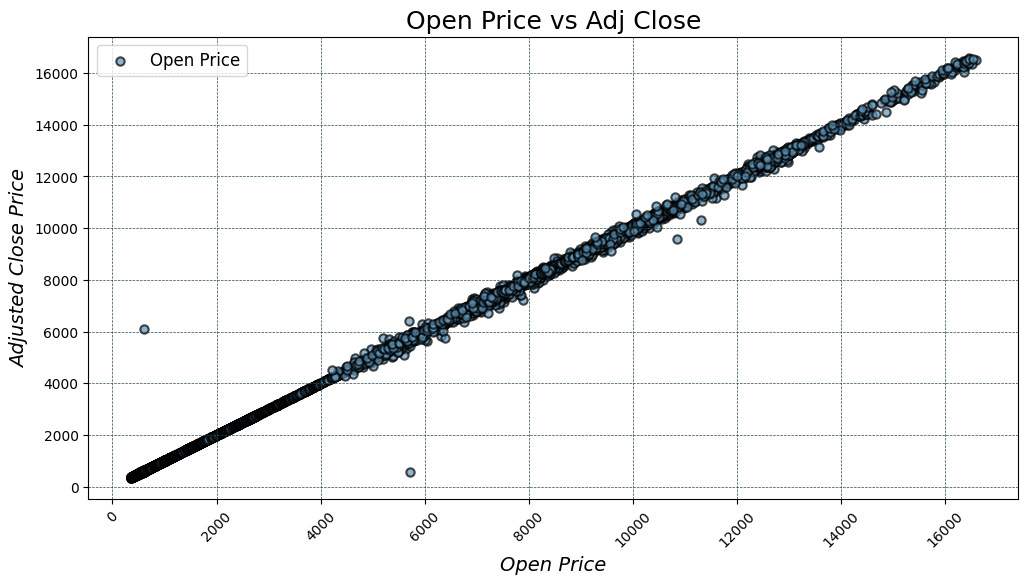

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df4['Open'], df4['Adj Close'], c='#6096ba', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Open Price'], loc='upper left', fontsize=12)
plt.title('Open Price vs Adj Close', fontsize=18)
plt.xlabel('Open Price', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()



    we can see two noise data that are not compatible with other data because they have a much larger and abnormal distance compared to other data values, and these are the two values ​​that are distinctly placed in the two graphs above and as can be seen in the second graph. , have an unusual distance from the regression line. After identifying the intervals and location of the noises, we have two ways to identify the visible noises in the mentioned scatterplot:



In [ ]:
N1 = df4[ (df4["Adj Close"]>5000) & (df4["Open"]<2000) ]
N1



Index       Date   Open   High    Low  Close  Adj Close  Day  Month  Year
831   NYA 1969-05-29  612.0  612.0  612.0  612.0     6111.0   29      5  1969

In [ ]:
N1_2 = df4[(df4["Adj Close"]>5000)]
N1_2

Index       Date     Open     High      Low    Close  Adj Close  Day  \
831     NYA 1969-05-29    612.0    612.0    612.0    612.0     6111.0   29   
7932    NYA 1997-07-03   5051.0   5051.0   5051.0   5051.0     5051.0    3   
7933    NYA 1997-07-07   5028.0   5028.0   5028.0   5028.0     5028.0    7   
7934    NYA 1997-07-08   5059.0   5059.0   5059.0   5059.0     5059.0    8   
7935    NYA 1997-07-09   5002.0   5002.0   5002.0   5002.0     5002.0    9   
...     ...        ...      ...      ...      ...      ...        ...  ...   
13943   NYA 2021-05-24  16375.0  16509.0  16375.0  16465.0    16465.0   24   
13944   NYA 2021-05-25  16465.0  16526.0  16375.0  16390.0    16390.0   25   
13945   NYA 2021-05-26  16390.0  16466.0  16388.0  16452.0    16452.0   26   
13946   NYA 2021-05-27  16452.0  16546.0  16452.0  16532.0    16532.0   27   
13947   NYA 2021-05-28  16532.0  16589.0  16532.0  16556.0    16556.0   28   

       Month  Year  
831        5  1969  
7932       7  1997  
7933       7  1997  
7934       7  1997  
7935       7  1997  
...      ...   ...  
13943      5  2021  
13944      5  2021  
13945      5  2021  
13946      5  2021  
13947      5  2021  

[5884 rows x 10 columns]

In [ ]:
N2 = df4[ (df4["Adj Close"]<1500) & (df4["Open"]>5000) ]
N2

Index       Date    Open   High    Low  Close  Adj Close  Day  Month  Year
852   NYA 1969-06-30  5722.0  572.0  572.0  572.0      572.0   30      6  1969

In [ ]:
N2_1 = df4[(df4["Open"]>5000)]
N2_1

Index       Date     Open     High      Low    Close  Adj Close  Day  \
852     NYA 1969-06-30   5722.0    572.0    572.0    572.0      572.0   30   
7932    NYA 1997-07-03   5051.0   5051.0   5051.0   5051.0     5051.0    3   
7933    NYA 1997-07-07   5028.0   5028.0   5028.0   5028.0     5028.0    7   
7934    NYA 1997-07-08   5059.0   5059.0   5059.0   5059.0     5059.0    8   
7935    NYA 1997-07-09   5002.0   5002.0   5002.0   5002.0     5002.0    9   
...     ...        ...      ...      ...      ...      ...        ...  ...   
13943   NYA 2021-05-24  16375.0  16509.0  16375.0  16465.0    16465.0   24   
13944   NYA 2021-05-25  16465.0  16526.0  16375.0  16390.0    16390.0   25   
13945   NYA 2021-05-26  16390.0  16466.0  16388.0  16452.0    16452.0   26   
13946   NYA 2021-05-27  16452.0  16546.0  16452.0  16532.0    16532.0   27   
13947   NYA 2021-05-28  16532.0  16589.0  16532.0  16556.0    16556.0   28   

       Month  Year  
852        6  1969  
7932       7  1997  
7933       7  1997  
7934       7  1997  
7935       7  1997  
...      ...   ...  
13943      5  2021  
13944      5  2021  
13945      5  2021  
13946      5  2021  
13947      5  2021  

[5884 rows x 10 columns]

In [ ]:
df5 = df4.drop(index = [831, 852])
df5

Index       Date     Open     High      Low    Close  Adj Close  Day  \
0       NYA 1965-12-31    529.0    529.0    529.0    529.0      529.0   31   
1       NYA 1966-01-03    527.0    527.0    527.0    527.0      527.0    3   
2       NYA 1966-01-04    528.0    528.0    528.0    528.0      528.0    4   
3       NYA 1966-01-05    531.0    531.0    531.0    531.0      531.0    5   
4       NYA 1966-01-06    532.0    532.0    532.0    532.0      532.0    6   
...     ...        ...      ...      ...      ...      ...        ...  ...   
13943   NYA 2021-05-24  16375.0  16509.0  16375.0  16465.0    16465.0   24   
13944   NYA 2021-05-25  16465.0  16526.0  16375.0  16390.0    16390.0   25   
13945   NYA 2021-05-26  16390.0  16466.0  16388.0  16452.0    16452.0   26   
13946   NYA 2021-05-27  16452.0  16546.0  16452.0  16532.0    16532.0   27   
13947   NYA 2021-05-28  16532.0  16589.0  16532.0  16556.0    16556.0   28   

       Month  Year  
0         12  1965  
1          1  1966  
2          1  1966  
3          1  1966  
4          1  1966  
...      ...   ...  
13943      5  2021  
13944      5  2021  
13945      5  2021  
13946      5  2021  
13947      5  2021  

[13930 rows x 10 columns]

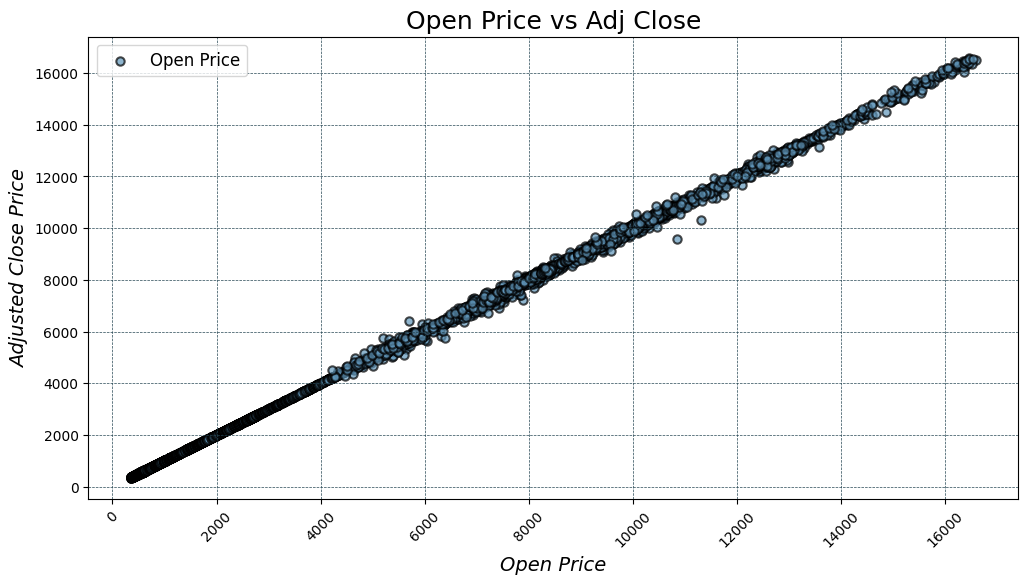

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df5['Open'], df5['Adj Close'], c='#6096ba', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Open Price'], loc='upper left', fontsize=12)
plt.title('Open Price vs Adj Close', fontsize=18)
plt.xlabel('Open Price', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()

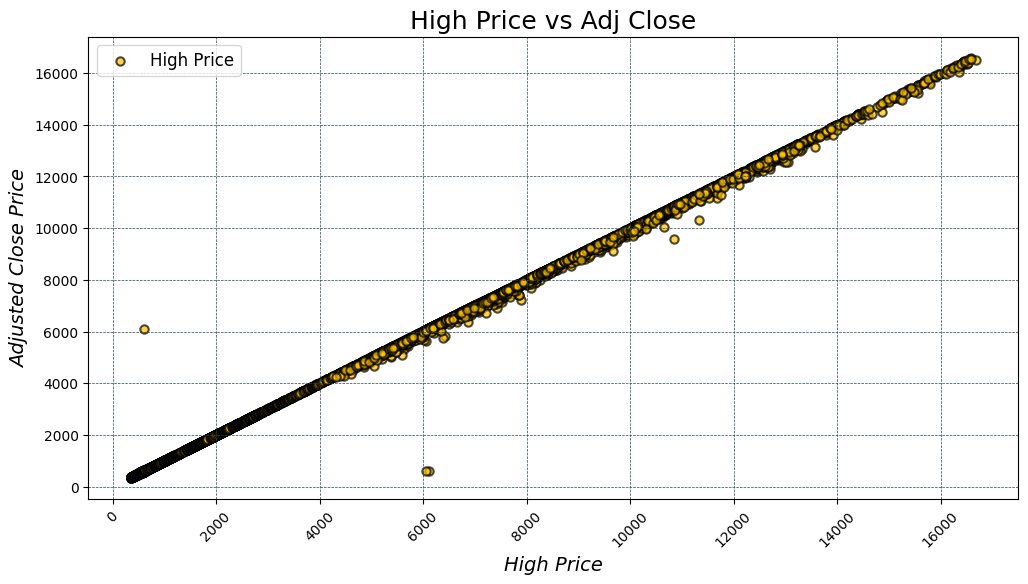

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df4['High'], df4['Adj Close'], c='#FFC300', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['High Price'], loc='upper left', fontsize=12)
plt.title('High Price vs Adj Close', fontsize=18)
plt.xlabel('High Price', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()



    there are two remaining data that have an unusual distance compared to other data values ​​and the regression line and should be considered as noise. For swimming, we have visible noises in the mentioned scatterplot:



In [ ]:
NN = df5[(df5["Adj Close"]<2000) & (df5["High"]>5000)]
NN

Index       Date   Open    High    Low  Close  Adj Close  Day  Month  Year
829   NYA 1969-05-27  612.0  6124.0  612.0  612.0      612.0   27      5  1969
833   NYA 1969-06-03  607.0  6066.0  607.0  607.0      607.0    3      6  1969

In [ ]:
df6=df5.drop(index=[829, 833])
df6

Index       Date     Open     High      Low    Close  Adj Close  Day  \
0       NYA 1965-12-31    529.0    529.0    529.0    529.0      529.0   31   
1       NYA 1966-01-03    527.0    527.0    527.0    527.0      527.0    3   
2       NYA 1966-01-04    528.0    528.0    528.0    528.0      528.0    4   
3       NYA 1966-01-05    531.0    531.0    531.0    531.0      531.0    5   
4       NYA 1966-01-06    532.0    532.0    532.0    532.0      532.0    6   
...     ...        ...      ...      ...      ...      ...        ...  ...   
13943   NYA 2021-05-24  16375.0  16509.0  16375.0  16465.0    16465.0   24   
13944   NYA 2021-05-25  16465.0  16526.0  16375.0  16390.0    16390.0   25   
13945   NYA 2021-05-26  16390.0  16466.0  16388.0  16452.0    16452.0   26   
13946   NYA 2021-05-27  16452.0  16546.0  16452.0  16532.0    16532.0   27   
13947   NYA 2021-05-28  16532.0  16589.0  16532.0  16556.0    16556.0   28   

       Month  Year  
0         12  1965  
1          1  1966  
2          1  1966  
3          1  1966  
4          1  1966  
...      ...   ...  
13943      5  2021  
13944      5  2021  
13945      5  2021  
13946      5  2021  
13947      5  2021  

[13928 rows x 10 columns]

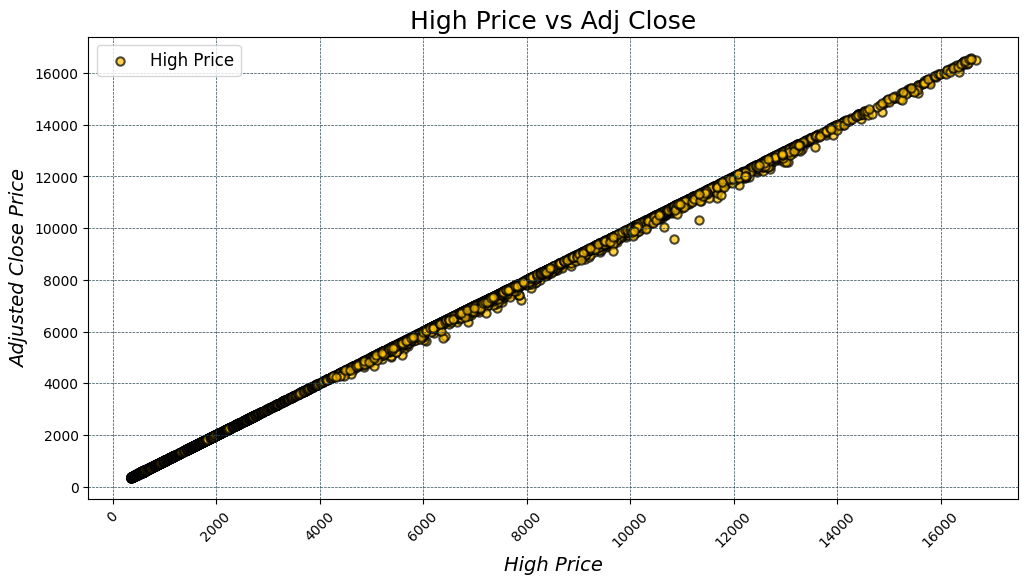

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df6['High'], df6['Adj Close'], c='#FFC300', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['High Price'], loc='upper left', fontsize=12)
plt.title('High Price vs Adj Close', fontsize=18)
plt.xlabel('High Price', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()

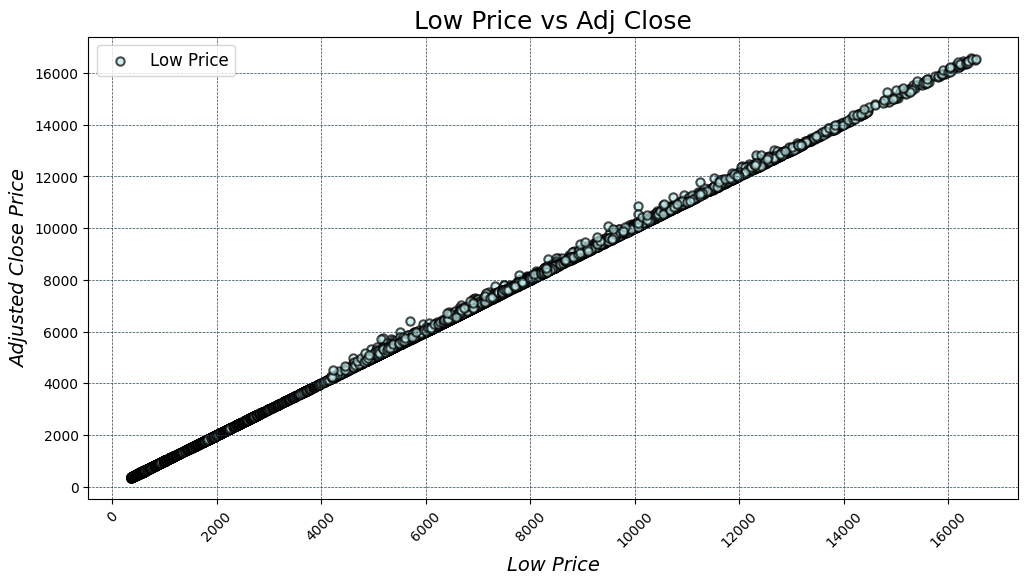

In [ ]:

plt.figure(figsize=(12, 6))
plt.scatter(df6['Low'], df6['Adj Close'], c='#bee9e8', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Low Price'], loc='upper left', fontsize=12)
plt.title('Low Price vs Adj Close', fontsize=18)
plt.xlabel('Low Price', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()



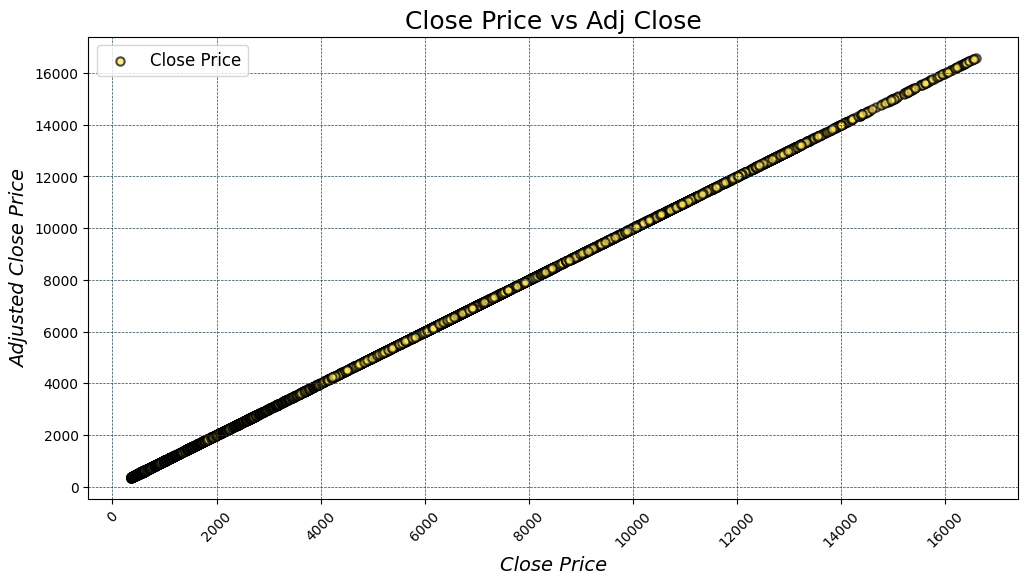

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df6['Close'], df6['Adj Close'], c='#ffe45e', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Close Price'], loc='upper left', fontsize=12)
plt.title('Close Price vs Adj Close', fontsize=18)
plt.xlabel('Close Price', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()



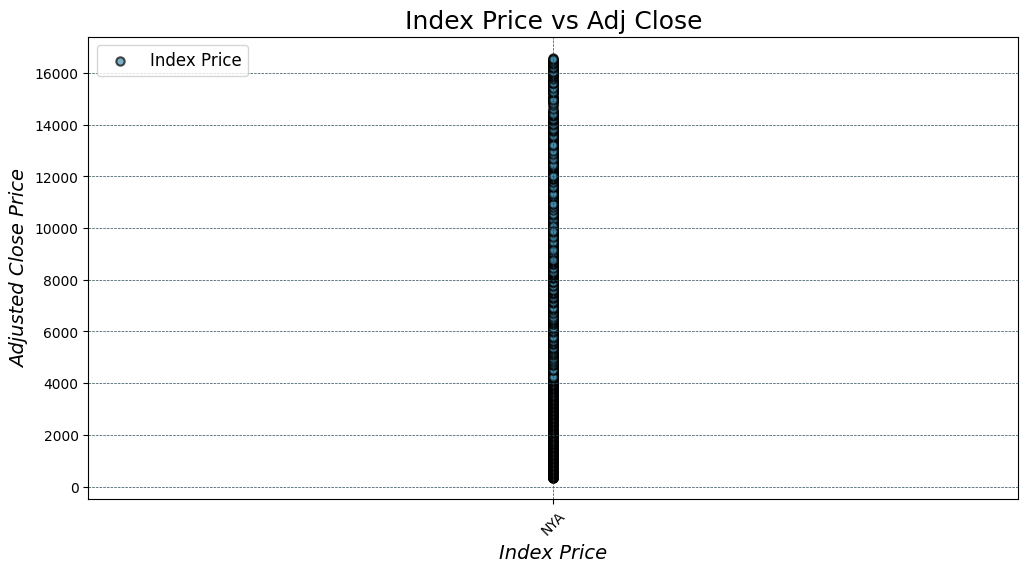

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df6['Index'], df6['Adj Close'], c='#468faf', alpha=0.7, marker='o', edgecolors='black', linewidth=1.5)
plt.legend(['Index Price'], loc='upper left', fontsize=12)
plt.title('Index Price vs Adj Close', fontsize=18)
plt.xlabel('Index Price', fontsize=14, fontstyle='italic')
plt.ylabel('Adjusted Close Price', fontsize=14, fontstyle='italic')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='#264653')
plt.show()


no other noise can be seen and we had removed all lines other than Nia at the beginning

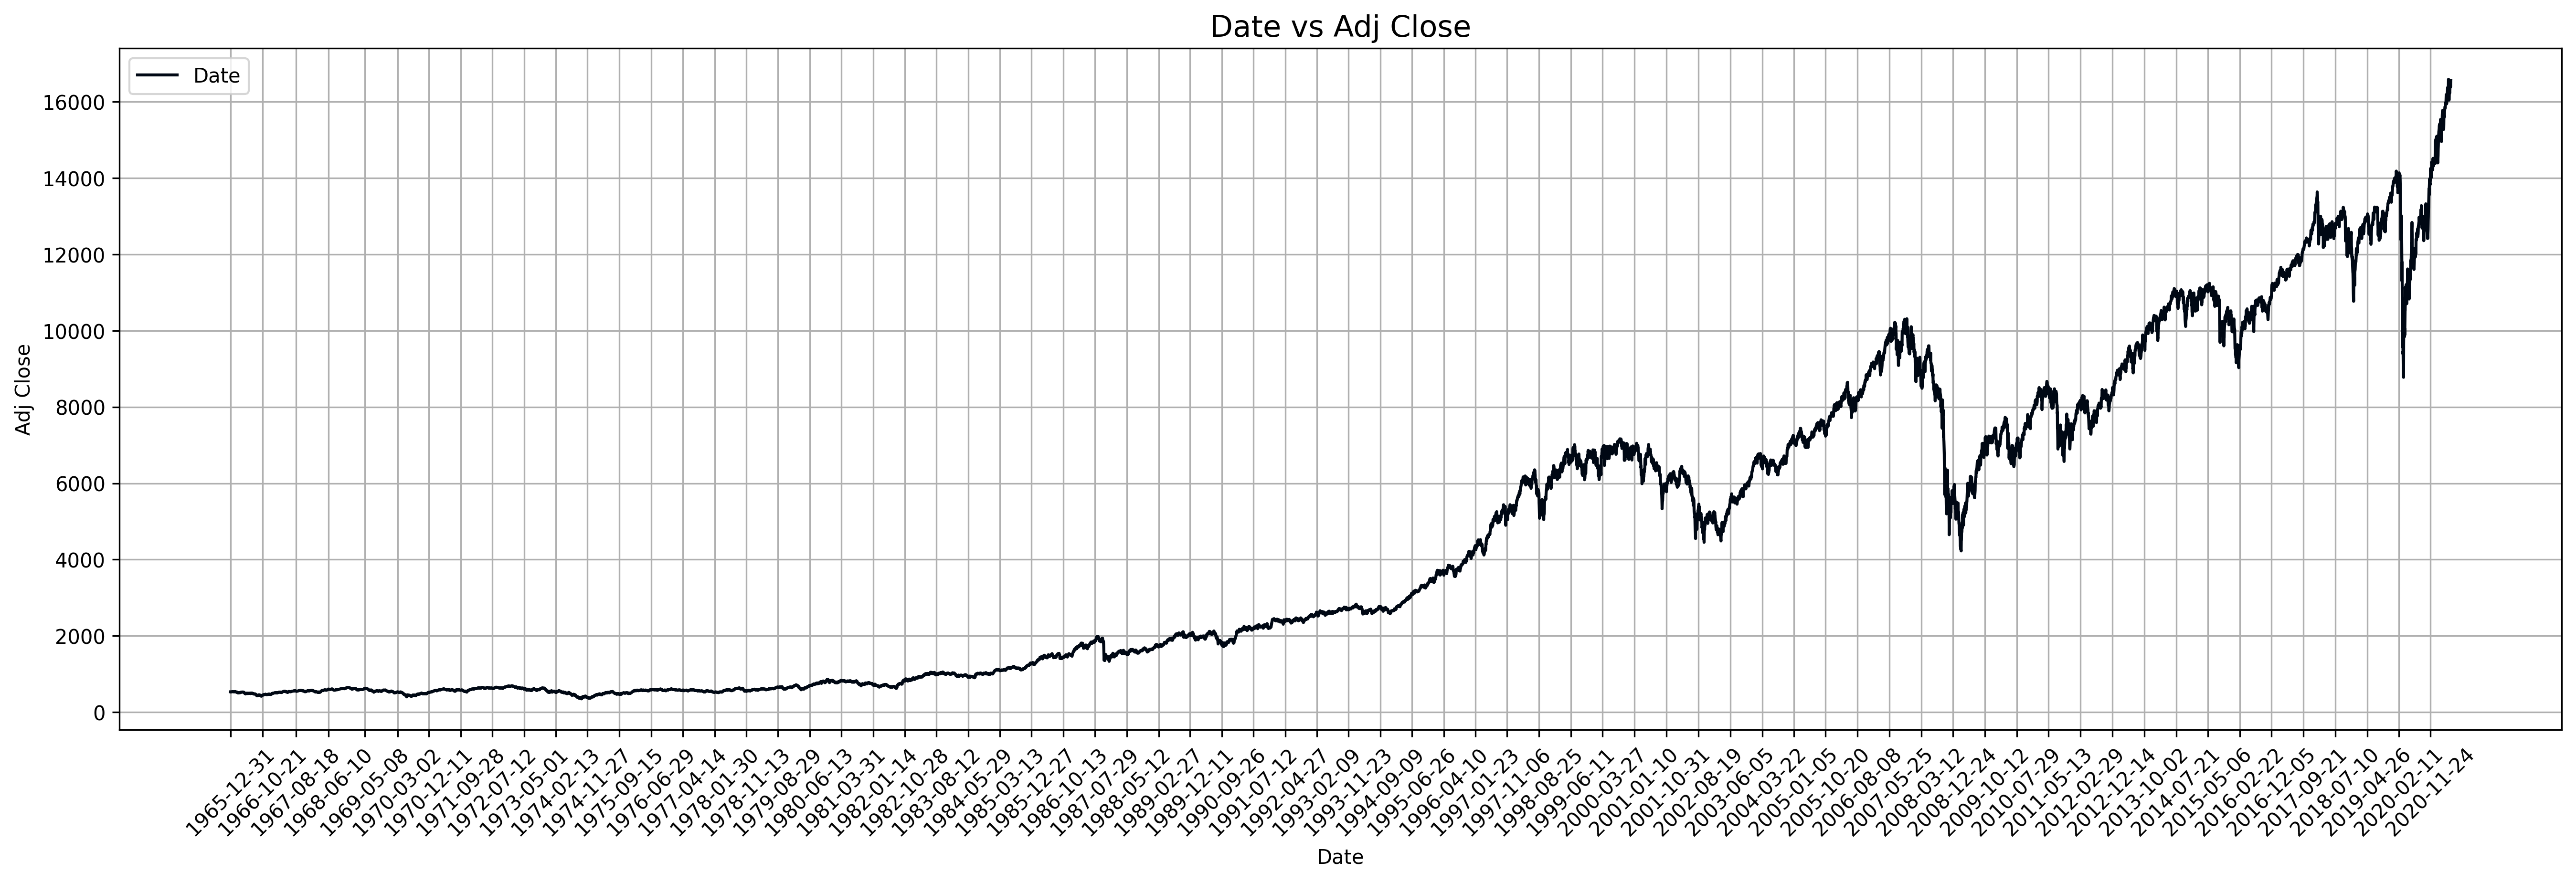

In [ ]:
plt.figure(figsize=(22, 7), dpi=300)
plt.plot(df6["Date"], df6["Adj Close"], c="#000814")
plt.legend(['Date'], loc = 'best')
plt.title('Date vs Adj Close', fontsize=15)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Adj Close', fontsize=10)
plt.xticks(df6["Date"][::200],  rotation=45)
plt.gcf().subplots_adjust(bottom=0.20)
plt.grid()
plt.show()



    as it was observed and expected, there were some noisy data, which were removed and we arrived at this final chart, but the general interpretation that indicates the upward progress of the final price with the passage of time remains, although there are always fluctuations and increases and decreases in the final price. and many economic factors including inflation can have played a big role in the results. Also, a factor like the corona pandemic seems to have had an impact on Navasanat. Other economic, social, and political factors should also be considered in the analysis of these changes.



In [ ]:
figure = px.pie(df4, values='Adj Close', names='Year',hole=0.25,color='Year',
                color_discrete_sequence=['#000814', '#001D3D','#003566','#FFC300','#FFD60A'])
figure.update_layout(title="Pie Chart of Adj Close Values by Year")
figure.update_traces(marker=dict(line=dict(color='white', width=2)),
                     text=df4['Year'].astype(str))
figure.update_layout(legend_title_text='Years',
                     width=1000,height=800)



In [ ]:

figure = px.pie(df5, values='Adj Close', names='Month',hole=0.25,color='Month',
                color_discrete_sequence=['#000814', '#001D3D','#003566','#FFC300','#FFD60A'])
figure.update_layout(title="Pie Chart of Adj Close Values by Month")
figure.update_traces(marker=dict(line=dict(color='white', width=2)),
                     text=df6['Month'].astype(str))
figure.update_layout(legend_title_text='Months',
                     width=1000,height=800)



In [ ]:
figure = px.pie(df6, values='Adj Close', names='Day',hole=0.25,color='Day',
                color_discrete_sequence=['#000814', '#001D3D','#003566','#FFC300','#FFD60A'])
figure.update_layout(title="Pie Chart of Adj Close Values by Day")
figure.update_traces(marker=dict(line=dict(color='white', width=2)),
                     text=df6['Day'].astype(str))
figure.update_layout(legend_title_text='Days',
                     width=1000,height=800)



In [ ]:
figure = go.Figure(data=[go.Candlestick(x=df6.index,open=df6["Open"],high=df6["High"],low=df6["Low"],
                                         close=df6["Adj Close"])])
figure.update_layout(title="Time Series Analysis (Candlestick Chart)",
                      xaxis_rangeslider_visible=False)
figure.show()



In [ ]:
df6["Date"] = pd.to_datetime(df6["Date"])
df6["Date"]

0       1965-12-31
1       1966-01-03
2       1966-01-04
3       1966-01-05
4       1966-01-06
           ...    
13943   2021-05-24
13944   2021-05-25
13945   2021-05-26
13946   2021-05-27
13947   2021-05-28
Name: Date, Length: 13928, dtype: datetime64[ns]

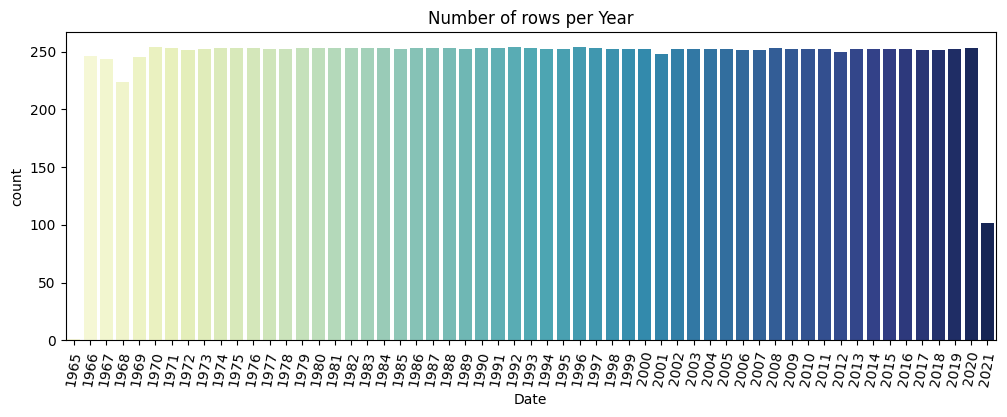

In [ ]:
Year = pd.to_datetime(df6["Date"]).dt.year
plt.figure(figsize=(12, 4))
plt.title('Number of rows per Year')
plt.xticks(rotation=80)
sns.countplot(x=Year,palette='YlGnBu')
plt.show()

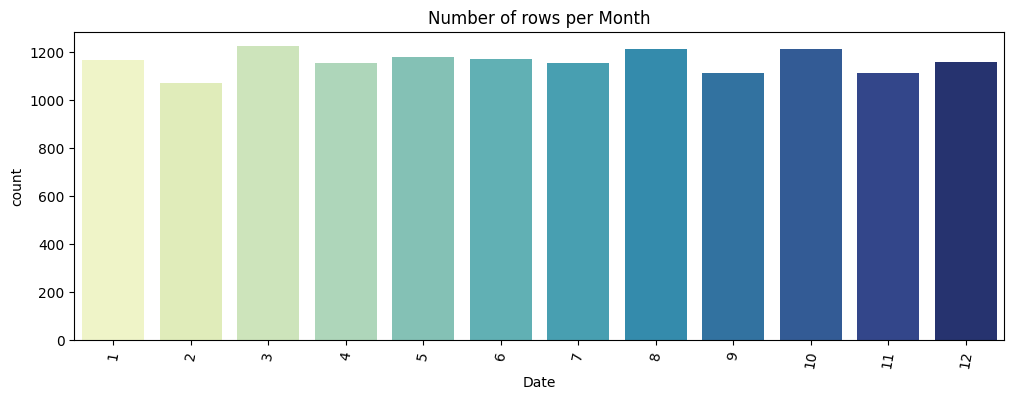

In [ ]:
Month = pd.to_datetime(df6["Date"]).dt.month
plt.figure(figsize=(12, 4))
plt.title('Number of rows per Month')
plt.xticks(rotation=80)
sns.countplot(x=Month,palette='YlGnBu')
plt.show()

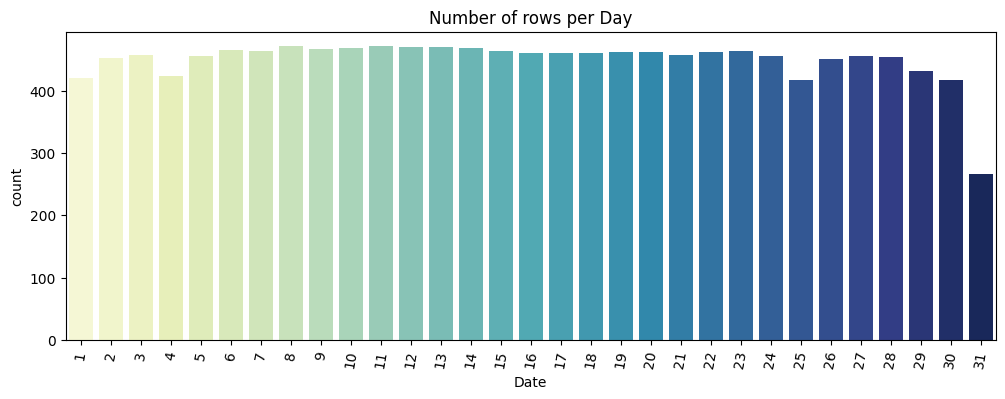

In [ ]:
Day = pd.to_datetime(df6["Date"]).dt.day
plt.figure(figsize=(12, 4))
plt.title('Number of rows per Day')
plt.xticks(rotation=80)
sns.countplot(x=Day,palette='YlGnBu')
plt.show()



    fewer data have been recorded for 2021, and some years such as 1965 to 1969 have less recorded data than the following years.

    the number of data recorded in different months of the year are different, and for example, for the third, eighth and tenth months of the year, more lines can be viewed and checked.

    the number of recorded data is also different for the days of each month. The largest number of lines belong to the 8th to the 14th of the month.



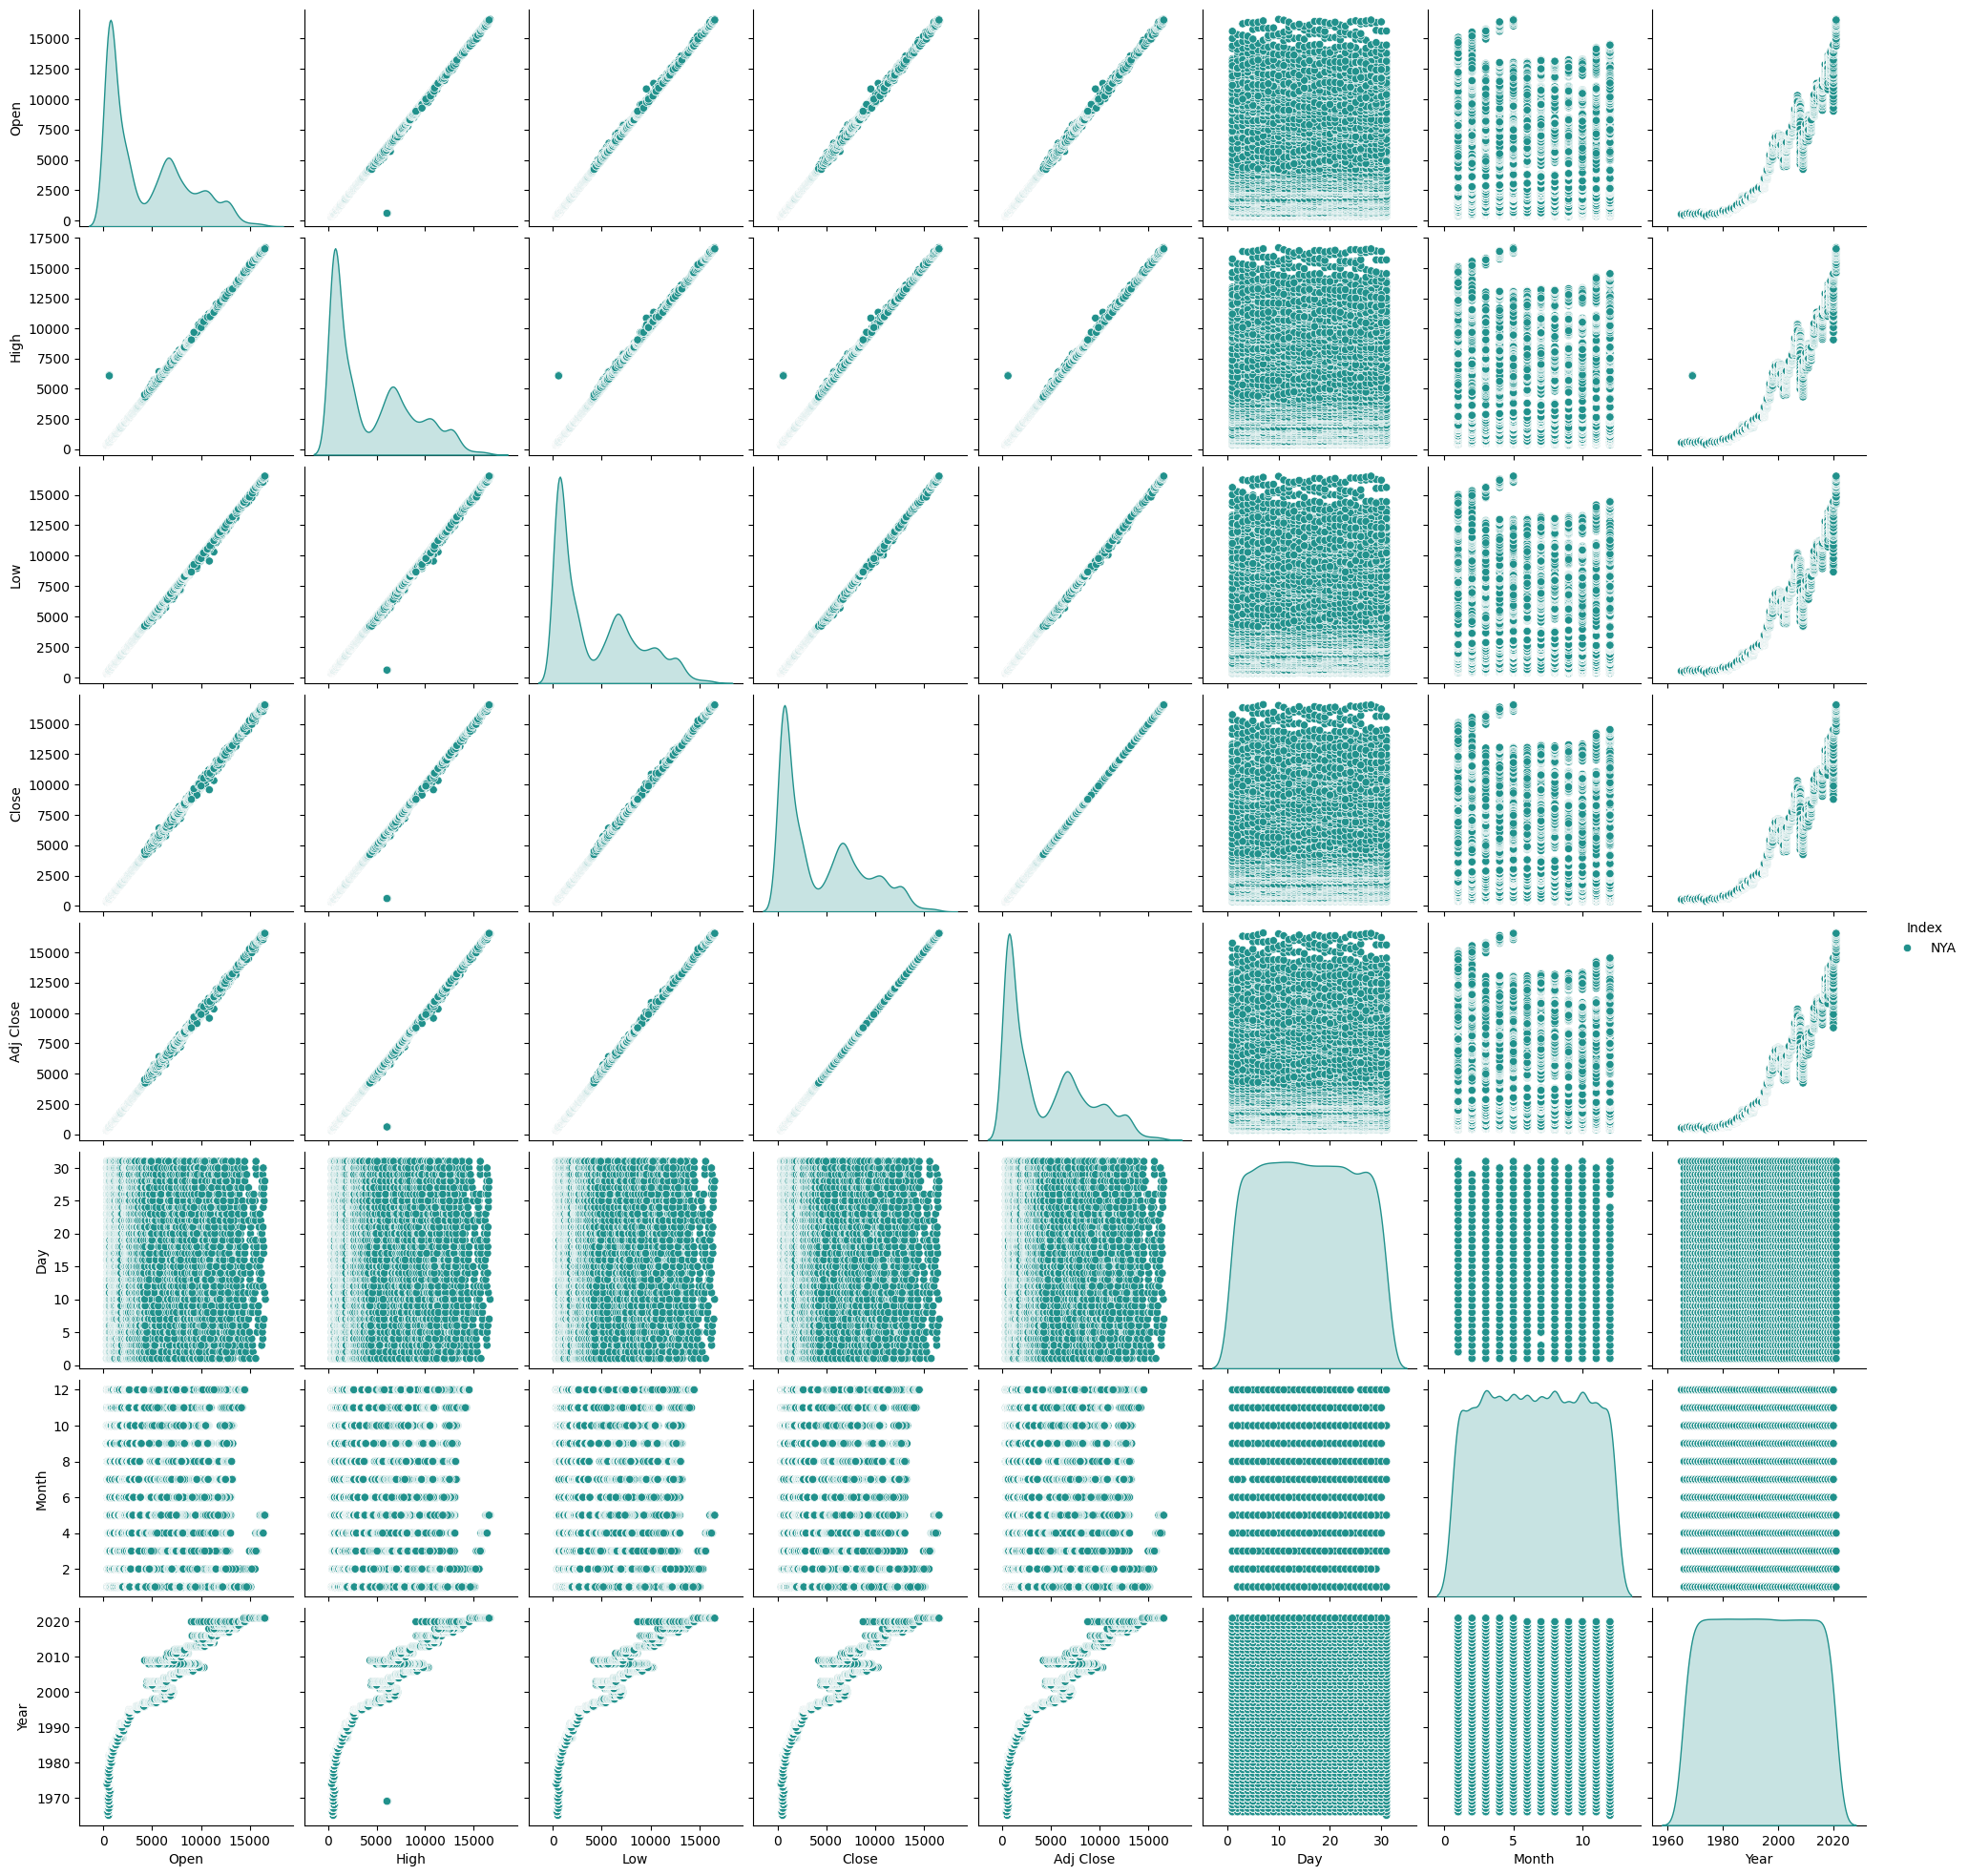

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df5,hue="Index", palette="viridis")
plt.show()

In [ ]:
import plotly.express as px
df7 = df6.drop('Index', axis=1)
z = df7.corr()
fig = px.imshow(z, text_auto=True,aspect="auto", color_continuous_scale='YlGnBu')
fig.show()

In [ ]:
print(z)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.935441  0.935646  0.935170  0.935425   0.935425   
Open       0.935441  1.000000  0.999963  0.999937  0.999912   0.999912   
High       0.935646  0.999963  1.000000  0.999912  0.999949   0.999949   
Low        0.935170  0.999937  0.999912  1.000000  0.999957   0.999957   
Close      0.935425  0.999912  0.999949  0.999957  1.000000   1.000000   
Adj Close  0.935425  0.999912  0.999949  0.999957  1.000000   1.000000   
Day        0.002179  0.001211  0.001121  0.001401  0.001157   0.001157   
Month      0.008990 -0.003225 -0.003267 -0.003052 -0.003231  -0.003231   
Year       0.999838  0.935500  0.935707  0.935226  0.935485   0.935485   

                Day     Month      Year  
Date       0.002179  0.008990  0.999838  
Open       0.001211 -0.003225  0.935500  
High       0.001121 -0.003267  0.935707  
Low        0.001401 -0.003052  0.935226  
Close      0.001157 -0.003231  0.935485  
Adj Clo



    the correlation coefficient is one of the criteria used to determine the correlation between two variables. The correlation coefficient shows the intensity of the relationship as well as the type of relationship (direct or inverse). This coefficient is between 1 and -1 and is equal to zero if there is no relationship between two variables. For example, the relationship of all prices with the year is direct.



In [ ]:
df6['SMA100'] = df6['Adj Close'].rolling(100).mean()
df6['SMA200'] = df6['Adj Close'].rolling(200).mean()



    the graph above illustrates the complete historical price movement between 1966 and 2021. The upward trajectory is a common feature of financial markets, where a moderate level of inflation usually persists. Economists link inflation to an upsurge in the money supply compared to available goods. Although high inflation is typically harmful, some experts suggest that a mild inflation rate can actually boost economic growth. In particular, when the economy is operating below its full capacity, indicating unused labor or resources, inflation can drive production. With more money circulating, there is increased spending, fueling aggregate demand, which, in turn, promotes higher production to meet the demand. SMA100 and SMA200 align with trend changes, offering stability to investors.



“SMA” stands for Simple Moving Average). These columns serve as 100-day and 200-day moving average indicators.

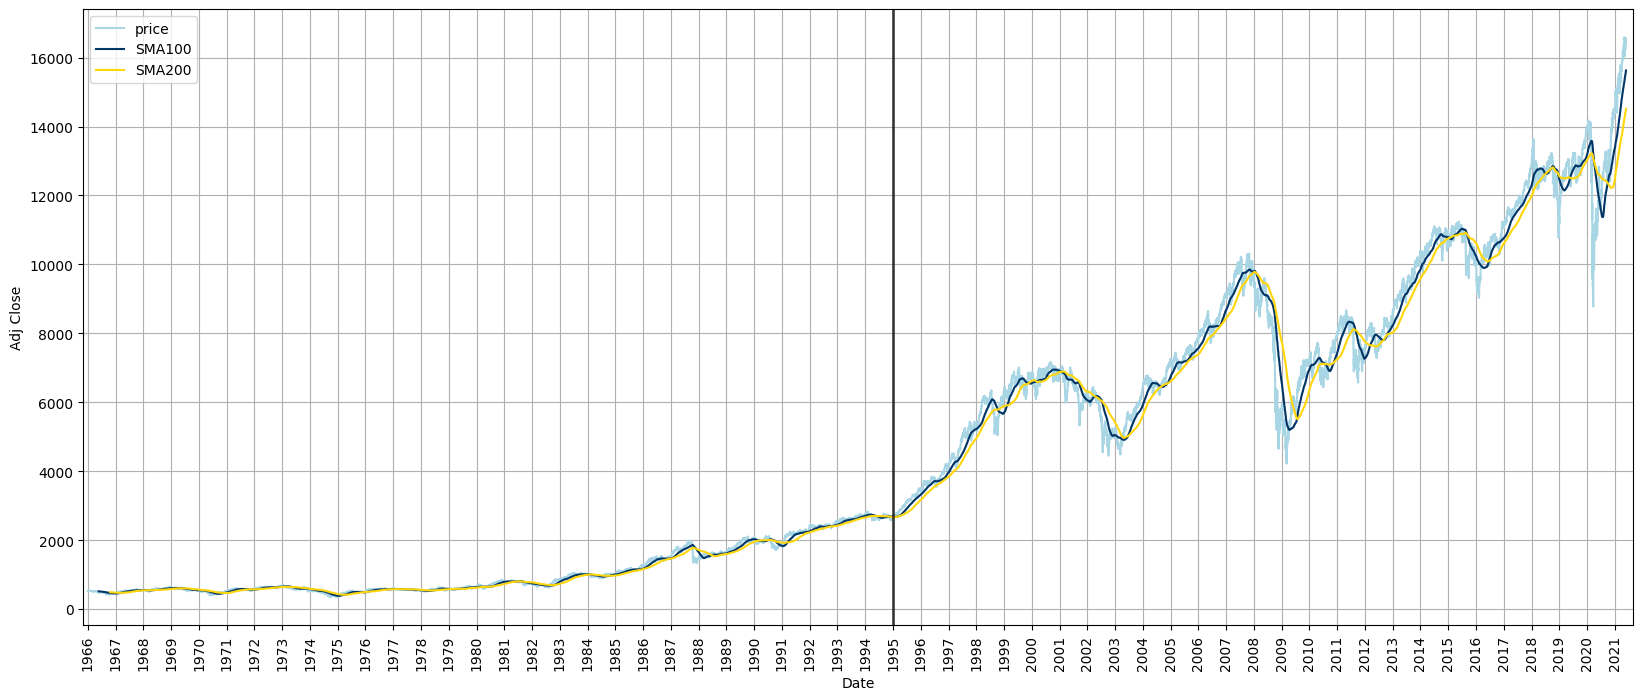

In [ ]:
import datetime as dt
formatt = mdates.DateFormatter('%Y')
locate = mdates.YearLocator(1, month=1, day=1)
fig = plt.figure(figsize=(20, 8))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatt)
ax.xaxis.set_major_locator(locate)
plt.plot(df6['Date'], df6['Adj Close'], color='#a9d6e5')
plt.plot(df6['Date'], df6['SMA100'], color='#003566')
plt.plot(df6['Date'], df6['SMA200'], color='#ffd60a')
plt.legend(['price', 'SMA100', 'SMA200'])
ax.tick_params('x', rotation=90)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xlim(left=mdates.date2num(dt.datetime(1965, 11, 1)),
         right=mdates.date2num(dt.datetime(2021, 9, 1)))
plt.grid()
plt.axvline(mdates.date2num(dt.datetime(1995, 1, 1)),
            color='#000000', lw=2, alpha=0.7)

plt.show()

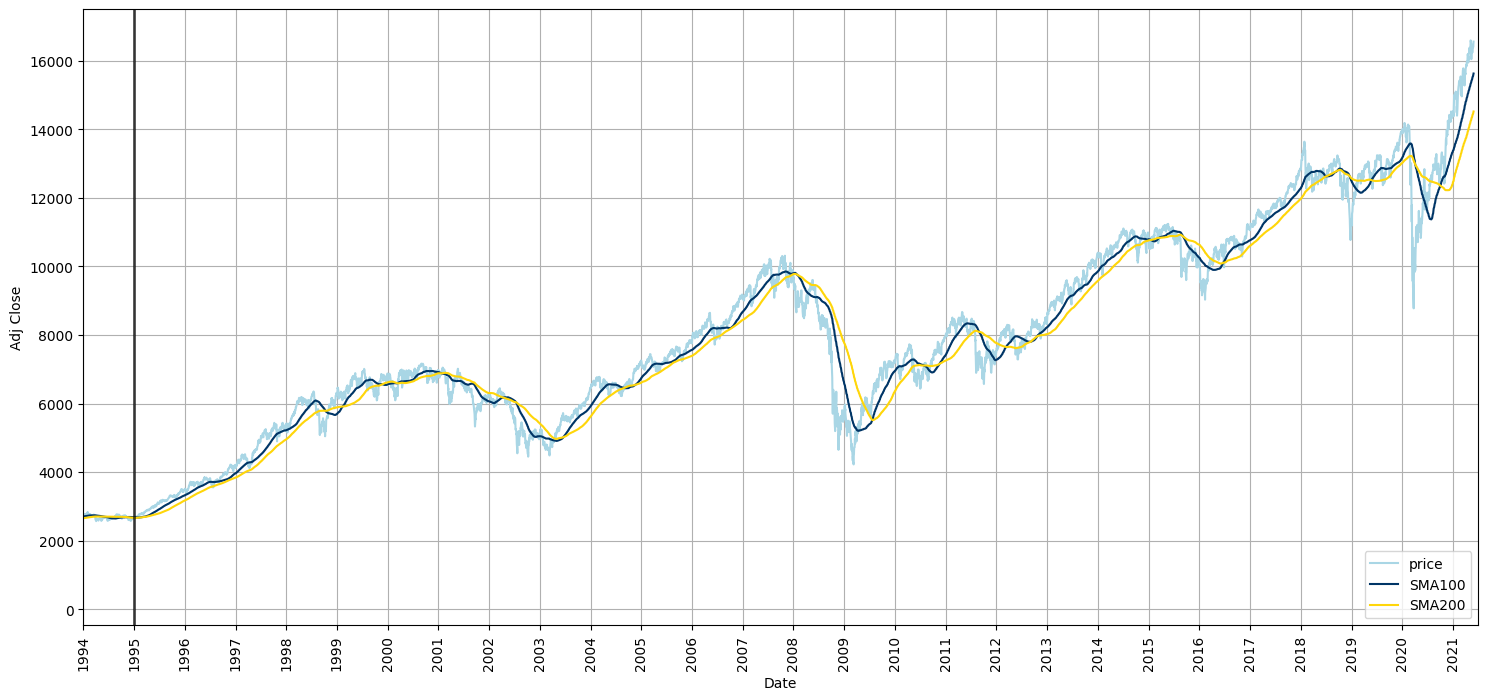

In [ ]:
formatt = mdates.DateFormatter('%Y')
locate = mdates.YearLocator(1, month=1, day=1)
fig = plt.figure(figsize=(18, 8))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatt)
ax.xaxis.set_major_locator(locate)
plt.plot(df6['Date'], df6['Adj Close'], color='#a9d6e5')
plt.plot(df6['Date'], df6['SMA100'], color='#003566')
plt.plot(df6['Date'], df6['SMA200'], color='#ffd60a')
plt.legend(['price', 'SMA100', 'SMA200'])
ax.tick_params('x', rotation=90)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.xlim(left=mdates.date2num(dt.datetime(1994, 1, 1)),
         right=mdates.date2num(dt.datetime(2021, 7, 1)))
plt.ylim(top=17500)
plt.grid()
plt.axvline(mdates.date2num(dt.datetime(1995, 1, 1)),
            color='#000000', lw=2, alpha=0.7)

plt.show()



    the graph above illustrates the complete historical price movement between 1966 and 2021. The upward trajectory is a common feature of financial markets, where a moderate level of inflation usually persists. Economists link inflation to an upsurge in the money supply compared to available goods. Although high inflation is typically harmful, some experts suggest that a mild inflation rate can actually boost economic growth. In particular, when the economy is operating below its full capacity, indicating unused labor or resources, inflation can drive production. With more money circulating, there is increased spending, fueling aggregate demand, which, in turn, promotes higher production to meet the demand. SMA100 and SMA200 align with trend changes, offering stability to investors.

